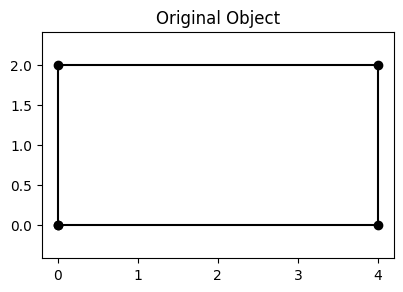

In [14]:
#task1
def plot_object(points, title, color='blue'):
    points = np.vstack([points, points[0]])  # Close the shape
    plt.plot(points[:, 0], points[:, 1], marker='o', color=color)
    plt.title(title)
    plt.axis('equal')

two_d_object = np.array([[0, 0], [4, 0], [4, 2], [0, 2]])

plt.figure(figsize=(10, 10))

plt.subplot(3, 2, 1)
plot_object(two_d_object, "Original Object", color='black')
plt.show()


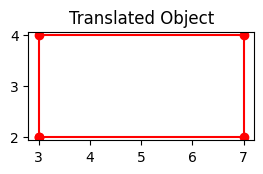

In [15]:
def translate(points, tx, ty):
    translation_matrix = np.array([[1, 0, tx], [0, 1, ty], [0, 0, 1]])
    points_homogeneous = np.hstack([points, np.ones((points.shape[0], 1))])
    translated_points = points_homogeneous @ translation_matrix.T
    return translated_points[:, :2]

translated_object = translate(two_d_object, tx=3, ty=2)
plt.subplot(3, 2, 2)
plot_object(translated_object, "Translated Object", color='red')
plt.show()


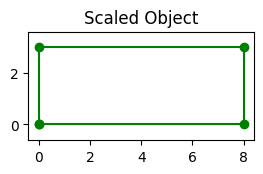

In [16]:

def scale(points, sx, sy):
    scaling_matrix = np.array([[sx, 0, 0], [0, sy, 0], [0, 0, 1]])
    points_homogeneous = np.hstack([points, np.ones((points.shape[0], 1))])
    scaled_points = points_homogeneous @ scaling_matrix.T
    return scaled_points[:, :2]

scaled_object = scale(two_d_object, sx=2, sy=1.5)
plt.subplot(3, 2, 3)
plot_object(scaled_object, "Scaled Object", color='green')
plt.show()


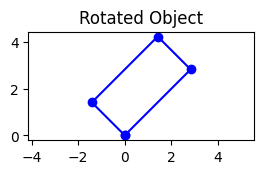

In [23]:

def rotate(points, angle):
    radians = np.radians(angle)
    rotation_matrix = np.array([
        [np.cos(radians), -np.sin(radians), 0],
        [np.sin(radians), np.cos(radians), 0],
        [0, 0, 1]
    ])
    points_homogeneous = np.hstack([points, np.ones((points.shape[0], 1))])
    rotated_points = points_homogeneous @ rotation_matrix.T
    return rotated_points[:, :2]
    # Rotation
rotated_object = rotate(two_d_object, angle=45)
plt.subplot(3, 2, 4)
plot_object(rotated_object, "Rotated Object", color='blue')


plt.show()



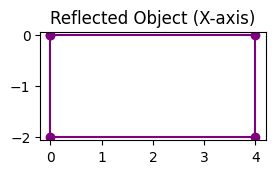

In [22]:
def reflect(points, axis):
    if axis == 'x':
        reflection_matrix = np.array([[1, 0, 0], [0, -1, 0], [0, 0, 1]])
    elif axis == 'y':
        reflection_matrix = np.array([[-1, 0, 0], [0, 1, 0], [0, 0, 1]])
    elif axis == 'origin':
        reflection_matrix = np.array([[-1, 0, 0], [0, -1, 0], [0, 0, 1]])
    points_homogeneous = np.hstack([points, np.ones((points.shape[0], 1))])
    reflected_points = points_homogeneous @ reflection_matrix.T
    return reflected_points[:, :2]
# Reflection
reflected_object = reflect(two_d_object, axis='x')
plt.subplot(3, 2, 5)
plot_object(reflected_object, "Reflected Object (X-axis)", color='purple')
plt.show()





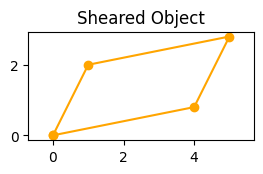

In [19]:
def shear(points, shx, shy):
    shearing_matrix = np.array([[1, shx, 0], [shy, 1, 0], [0, 0, 1]])
    points_homogeneous = np.hstack([points, np.ones((points.shape[0], 1))])
    sheared_points = points_homogeneous @ shearing_matrix.T
    return sheared_points[:, :2]


# Shearing
sheared_object = shear(two_d_object, shx=0.5, shy=0.2)
plt.subplot(3, 2, 6)
plot_object(sheared_object, "Sheared Object", color='orange')
plt.show()


In [24]:
#task 2

In [26]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
image = cv2.imread(r"C:\Users\Pranshu Saini\Desktop\Picture1.jpg")
plt.figure(figsize=(12, 12))


<Figure size 1200x1200 with 0 Axes>

<Figure size 1200x1200 with 0 Axes>

Text(0.5, 1.0, 'Translated Image')

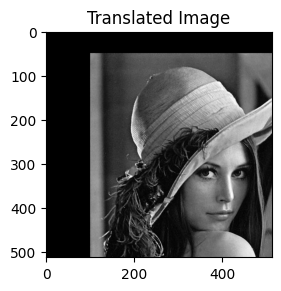

In [40]:
def translate_image(image, tx, ty):
    M = np.float32([[1, 0, tx], [0, 1, ty]])
    translated_image = cv2.warpAffine(image, M, (image.shape[1], image.shape[0]))
    return translated_image
translated_image = translate_image(image, 100, 50)  # Example: translate by (100, 50)
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(translated_image, cv2.COLOR_BGR2RGB))
plt.title('Translated Image')


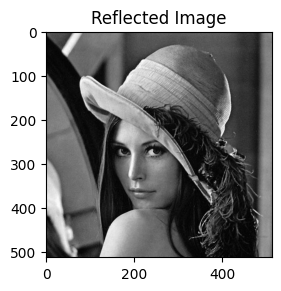

In [41]:
def reflect_image(image, axis='horizontal'):
    if axis == 'horizontal':
        reflected_image = cv2.flip(image, 1)  # Horizontal reflection
    elif axis == 'vertical':
        reflected_image = cv2.flip(image, 0)  # Vertical reflection
    return reflected_image
reflected_image = reflect_image(image, 'horizontal')  # Horizontal reflection
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(reflected_image, cv2.COLOR_BGR2RGB))
plt.title('Reflected Image')
plt.show()

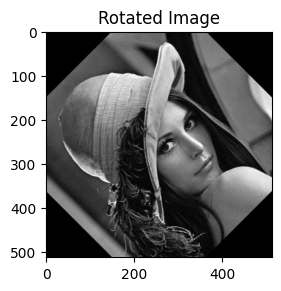

In [42]:
def rotate_image(image, angle):
    center = (image.shape[1] // 2, image.shape[0] // 2)
    M = cv2.getRotationMatrix2D(center, angle, 1.0)
    rotated_image = cv2.warpAffine(image, M, (image.shape[1], image.shape[0]))
    return rotated_image
rotated_image = rotate_image(image, 45)  # Rotate by 45 degrees
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(rotated_image, cv2.COLOR_BGR2RGB))
plt.title('Rotated Image')
plt.show()

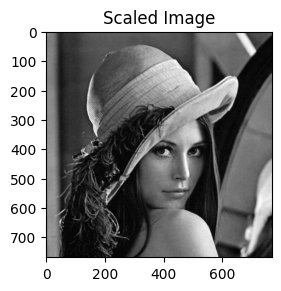

In [43]:
def scale_image(image, fx, fy):
    scaled_image = cv2.resize(image, None, fx=fx, fy=fy, interpolation=cv2.INTER_LINEAR)
    return scaled_image
scaled_image = scale_image(image, 1.5, 1.5)  # Scale by 1.5x
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(scaled_image, cv2.COLOR_BGR2RGB))
plt.title('Scaled Image')
plt.show()

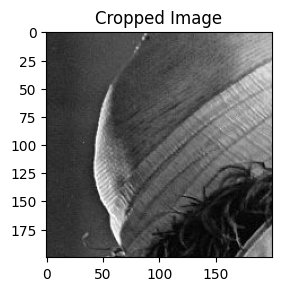

In [44]:
def crop_image(image, x, y, w, h):
    cropped_image = image[y:y+h, x:x+w]
    return cropped_image
cropped_image = crop_image(image, 50, 50, 200, 200)  # Crop a region (50, 50) to (200, 200)
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(cropped_image, cv2.COLOR_BGR2RGB))
plt.title('Cropped Image')
plt.show()

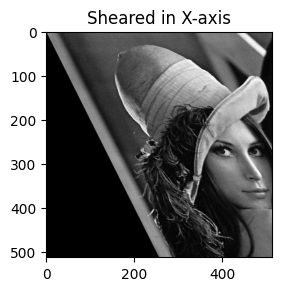

In [45]:
def shear_x(image, shear_factor):
    M = np.float32([[1, shear_factor, 0], [0, 1, 0]])
    sheared_image_x = cv2.warpAffine(image, M, (image.shape[1], image.shape[0]))
    return sheared_image_x
sheared_image_x = shear_x(image, 0.5)  # Shear in X-axis
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(sheared_image_x, cv2.COLOR_BGR2RGB))
plt.title('Sheared in X-axis')
plt.show()

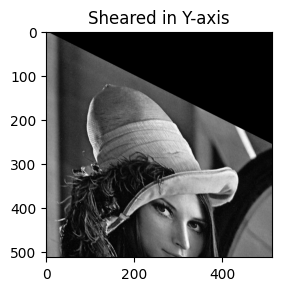

In [46]:
def shear_y(image, shear_factor):
    M = np.float32([[1, 0, 0], [shear_factor, 1, 0]])
    sheared_image_y = cv2.warpAffine(image, M, (image.shape[1], image.shape[0]))
    return sheared_image_y
sheared_image_y = shear_y(image, 0.5)  # Shear in Y-axis
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(sheared_image_y, cv2.COLOR_BGR2RGB))
plt.title('Sheared in Y-axis')
plt.show()